# Ejercicio 3

In [91]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [104]:
# leemos el fichero y cambiamos las fechas a su formato correcto. Siempre parsear las fechas para evitar errores.

s = pd.read_csv("searches.csv.bz2", sep='^', nrows=100000, usecols=['Date', 'Destination'],parse_dates=['Date'])

In [105]:
x = s.Date[1]

In [106]:
# ahora podemos trabajar ya con las fechas ok.
x

Timestamp('2013-01-01 00:00:00')

In [107]:
x.year

2013

In [108]:
s.Date[1].year

2013

In [152]:
# Con lambda
# m = s2.Date.apply(lambda d: d.month)

# con función
def dateToMonth(d):
    return d.month
m = s.Date.apply(dateToMonth)

In [153]:
s['Month'] = m

In [154]:
s.head()

,Date,Destination,Month
0,2013-01-01,AUH,1
1,2013-01-01,MIL,1
2,2013-01-01,SFO,1
3,2013-01-01,ARN,1
4,2013-01-01,MAD,1


In [155]:
s.count()

Date           100000
Destination    100000
Month          100000
dtype: int64

In [156]:
# Filtramos

i = s.Destination.isin(['MAD','AGP','BCN'])
filtrado = s[i]

In [157]:
s.count()

Date           100000
Destination    100000
Month          100000
dtype: int64

In [158]:
filtrado.count()

Date           3663
Destination    3663
Month          3663
dtype: int64

In [159]:
g = filtrado.groupby(['Destination', 'Month']).count()

In [171]:
g

Date
Destination Month      
AGP         1       169
            2       147
            3       187
            4        31
BCN         1       517
            2       497
            3       536
            4       174
MAD         1       425
            2       400
            3       433
            4       147

In [160]:
# Necesitamos corregir el dataFrame

df = g.reset_index()

In [161]:
df

,Destination,Month,Date
0,AGP,1,169
1,AGP,2,147
2,AGP,3,187
3,AGP,4,31
4,BCN,1,517
5,BCN,2,497
6,BCN,3,536
7,BCN,4,174
8,MAD,1,425
9,MAD,2,400


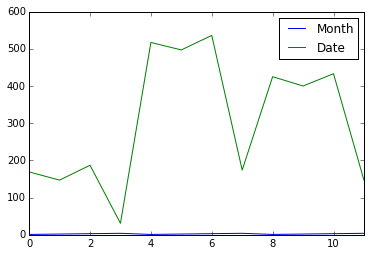

In [166]:
# Mirar como modificar el plot para sacarlo bien.

df.plot()

In [167]:
# Vamos a pivotar para mostrar los datos de otra forma.

pivoted = df.pivot('Month', 'Destination', 'Date')

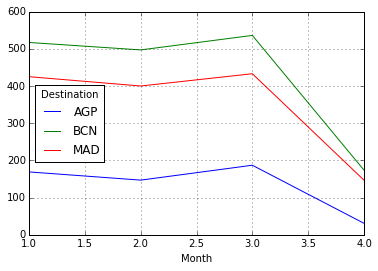

In [170]:
pivoted.plot(grid=True)